<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de ordenamiento

Los problemas de ordenamiento desde hace mucho tiempo llevan siendo un desafío para los programadores ya que siempre se intenta buscar algún algoritmo el cual pueda resolverlos de la forma más rápida posible con el menor tiempo.

Por esta misma razón se decidió inventar un nuevo método de ordenamiento conocido como BucketSort.

Entrada: una secuencia de n números $[a_1, a_2,...,a_n]$

Salida: Retorna una secuencia de n números ordenada de menor a mayor donde $a'_1 \leq a'_2 \leq ... \leq a'_n$.

#2. BucketSort

##2.1. Descripción del algoritmo

El algoritmo BucketSort consiste en generar una matriz de largo $n$ $x$ $m$, donde $n$ viene siendo el largo del arreglo de entrada y $m$ corresponde a la cantidad de datos que irán guardados en cada sub-array, los cuales tendrán un rango en especifico para que a través de una operación matemática los datos se posicionen en cada sub-arreglo sin realizar comparaciones, el proposito de esto es diminuir el tamaño de entrada de nuestros arreglos para que la función de ordenamiento auxiliar (en nuestro caso el InsertionSort) no realice tantos procesos a la hora de ordenar la lista de entrada.

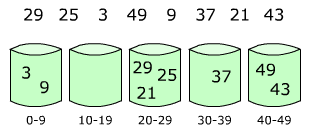

##2.2. Código

In [ ]:
def InsertionSort(bucket):
    for i in range (1, len (bucket)):
        var = bucket[i]
        j = i - 1
        while (j >= 0 and var < bucket[j]):
            bucket[j + 1] = bucket[j]
            j = j - 1
        bucket[j + 1] = var

In [ ]:
def BucketSort(input_list):
    # Find maximum value in the list and use length of the list to determine which value in the list goes into which bucket 
    max_value = max(input_list)
    size = max_value/len(input_list)

    # Create n empty buckets where n is equal to the length of the input list
    buckets_list= []
    for x in range(len(input_list)):
        buckets_list.append([]) 

    # Put list elements into different buckets based on the size
    for i in range(len(input_list)):
        j = int (input_list[i] / size)
        if j != len (input_list):
            buckets_list[j].append(input_list[i])
        else:
            buckets_list[len(input_list) - 1].append(input_list[i])

    print(buckets_list)
    # Sort elements within the buckets using Insertion Sort
    for z in range(len(input_list)):
        InsertionSort(buckets_list[z])
            
    # Concatenate buckets with sorted elements into a single list
    final_output = []
    for x in range(len (input_list)):
        final_output = final_output + buckets_list[x]
    return final_output

In [ ]:
A = [2,3,4,1,8,7]

A = BucketSort(A)
print(A)

[[1], [2], [3], [4], [], [8, 7]]
[1, 2, 3, 4, 7, 8]
